# Description

Using Dr Ignaz Semmelweis data to drill down into his very conclusion about the bacterias. The data was published in 1861.

### Import Statements

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px
# import seaborn as sns   
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Read the Data

In [55]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

This is the kind of information of the data per year:

In [29]:
display(df_yearly.head(5))

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


This is the kind of information of the data per month:

In [30]:
display(df_monthly.head(5))

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


The data size of the set are:

In [31]:
print(f'Yearly data: {df_yearly.shape}')
print(f'Monthly data: {df_monthly.shape}')

Yearly data: (12, 4)
Monthly data: (98, 3)


Time time span of the yearly data is:

In [32]:
print(f'Min year: {df_yearly.year.min()}')
print(f'Max year: {df_yearly.year.max()}')

Min year: 1841
Max year: 1846


Time time span of the monthly data is:

In [33]:
print(f'Min year: {df_monthly.date.dt.year.min()}')
print(f'Max year: {df_monthly.date.dt.year.max()}') 

Min year: 1841
Max year: 1849


Then number of clinics on the yearly dataset: 

In [18]:
clinic_list = df_yearly['clinic'].unique()
print('The list of clinis is:')
print(clinic_list)

The list of clinis is:
['clinic 1' 'clinic 2']


### Nan Values and Duplicates

NaN on te yearly data

In [34]:
display(df_yearly[df_yearly.isnull().any(axis=1)])

,year,births,deaths,clinic


NaN on te monthly data'

In [35]:
display(df_yearly[df_yearly.isnull().any(axis=1)])

,year,births,deaths,clinic


Duplicates on the yearly data

In [43]:
df_yearly[df_yearly.duplicated()]

,year,births,deaths,clinic


Duplicates on the monthly data

In [44]:
df_monthly[df_monthly.duplicated()]

,date,births,deaths


### Descriptive Statistics

On the yearly data: 

In [38]:
df_yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


On the monthly data:

In [39]:
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


## Data analysis

In [56]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


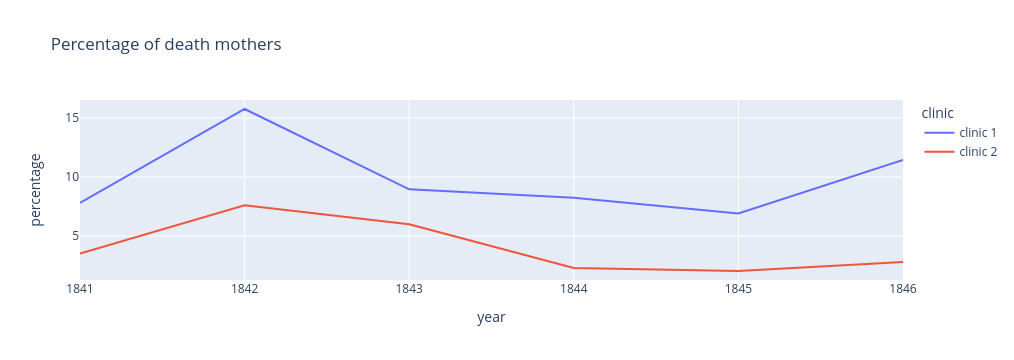

In [57]:
df_yearly['percentage'] = df_yearly.deaths/df_yearly.births*100
fig = px.line(df_yearly, 
             x='year',
             y='percentage',
             title='Percentage of death mothers',
             color='clinic')
fig.show()

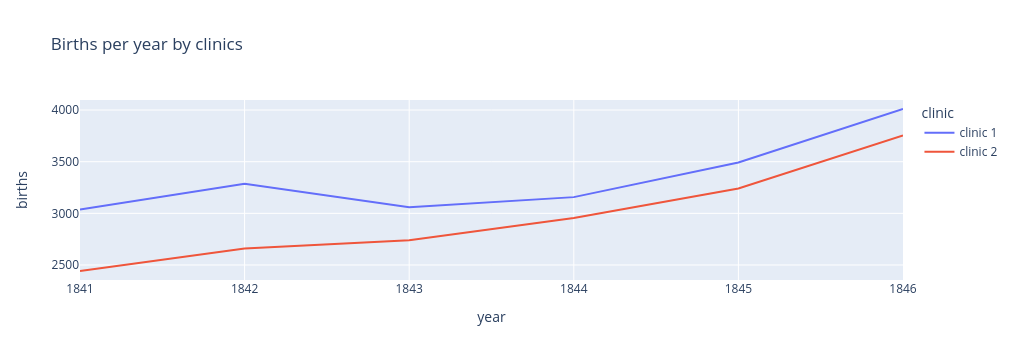

In [58]:
fig = px.line(df_yearly, 
             x='year',
             y='births',
             title='Births per year by clinics',
             color='clinic')
fig.show()

# Handwashing effect

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

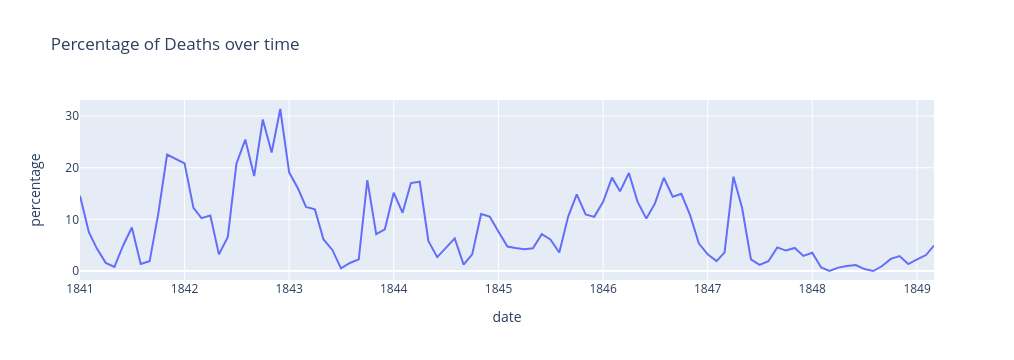

In [63]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')
df_monthly['percentage'] = df_monthly.deaths/df_monthly.births*100
fig = px.line(df_monthly, 
             x='date',
             y='percentage',
             title='Percentage of Deaths over time',
             )
fig.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate


The average percentage of monthly deaths before hashing hands is:

In [102]:
round(df_monthly[df_monthly['date']<handwashing_start]['percentage'].mean(),3)

10.505

And after handwashing is:

In [101]:
round(df_monthly[df_monthly['date']>handwashing_start]['percentage'].mean(),3)

2.103

So, once handwashing was introduced, the death rate deccreased from 10.5 % to 2.1 %. Amazing! 

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



Sepparating the data at the moment where handwashing was introduced

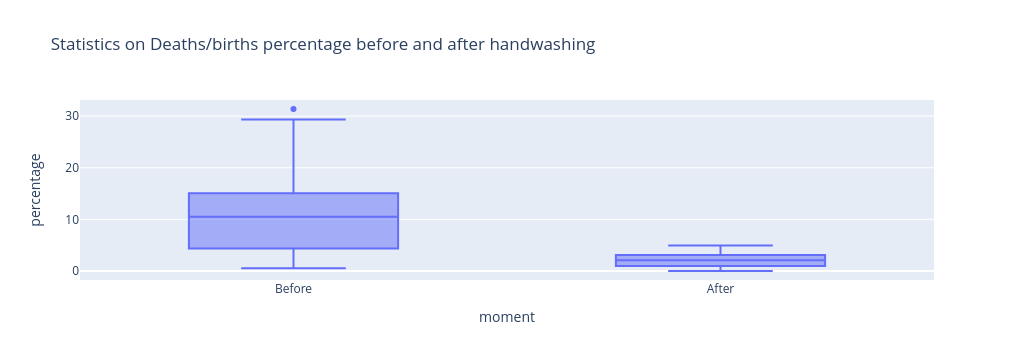

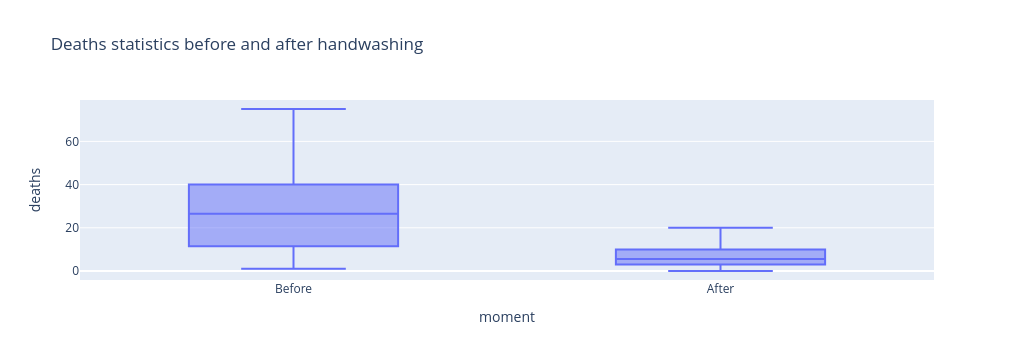

In [109]:
import numpy as np
df_monthly['moment'] = np.where(df_monthly['date'] < handwashing_start, 'Before', 'After')
fig = px.box(df_monthly,
            x='moment',
            y='percentage',
            title='Statistics on Deaths/births percentage before and after handwashing')
fig.show()
fig = px.box(df_monthly,
            x='moment',
            y='deaths',
            title='Deaths statistics before and after handwashing')
fig.show()


### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [113]:
import scipy.stats 

t_stats, p_value = scipy.stats.ttest_ind(df_monthly[df_monthly['date']<handwashing_start]['percentage'],
                     df_monthly[df_monthly['date']>=handwashing_start]['percentage'],)

In [114]:
p_value

2.9854365567245336e-07

This clearly shows that there was a difference in the handwashing, since the datasets arewell appart from each other. Something had changed! 